In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sea_ice_drift import SeaIceDrift

%matplotlib inline

In [2]:
# set names of files
f1 = 'S1B_EW_GRDM_1SDH_20200123T120618.tif'
f2 = 'S1B_EW_GRDM_1SDH_20200125T114955.tif'
# create SeaIceDrift object
sid = SeaIceDrift(f1, f2)

Cannot add landmask
VMIN:  -22.628240203857423
VMAX:  -9.868122138977043
Cannot add landmask
VMIN:  -23.267868041992188
VMAX:  -10.92607064247131


In [3]:
# run Feature Tracking
uft, vft, lon1ft, lat1ft, lon2ft, lat2ft = sid.get_drift_FT()

ORB detector initiated
Key points found: 27961
ORB detector initiated
Key points found: 26946
Domain filter: 27961 -> 27484
Domain filter: 26946 -> 26394
Keypoints matched 4.441568851470947
Ratio test 0.700000 found 3443 keypoints
MaxDrift filter: 3443 -> 3443
LSTSQ filter: 3443 -> 3442


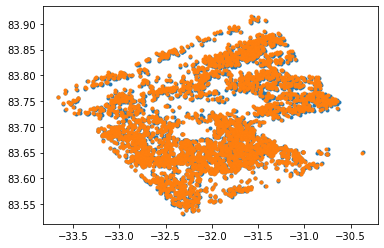

In [4]:
# plot identified and matched keypoints
plt.plot(lon1ft, lat1ft, '.')
plt.plot(lon2ft, lat2ft, '.')

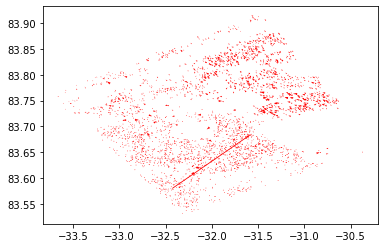

In [5]:
# plot ice drift vectors calculated from the keypoints
plt.quiver(lon1ft, lat1ft, uft, vft, color='r',
           angles='xy', scale_units='xy', scale=1)

Text(0.5, 1.0, 'Latitude grid')

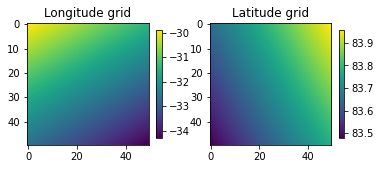

In [6]:
# create longitude and latitude grids at satellite projection
step = 10
lon1pm, lat1pm = sid.n1.get_geolocation_grids(stepSize=step)
plt.subplot(1,2,1);plt.imshow(lon1pm);plt.colorbar(shrink=0.5);plt.title('Longitude grid')
plt.subplot(1,2,2);plt.imshow(lat1pm);plt.colorbar(shrink=0.5);plt.title('Latitude grid')

In [7]:
# run pattern matching
upm, vpm, apm, rpm, hpm, lon2pm, lat2pm = sid.get_drift_PM(
                                    lon1pm, lat1pm,
                                    lon1ft, lat1ft,
                                    lon2ft, lat2ft)

85% 00129.8 00360.1 00166.0 00412.0 +00.0 0.65 12.1326% 00190.1 00129.7 00214.0 00179.0 +00.0 0.81 13.4746% 00389.6 00199.7 00418.0 00234.0 +00.0 0.76 11.6072% 00080.0 00309.5 00113.0 00365.0 +00.0 0.55 14.2366% 00250.2 00280.2 00281.0 00324.0 +00.0 0.87 12.68
 Pattern matching - OK! (  2 sec)


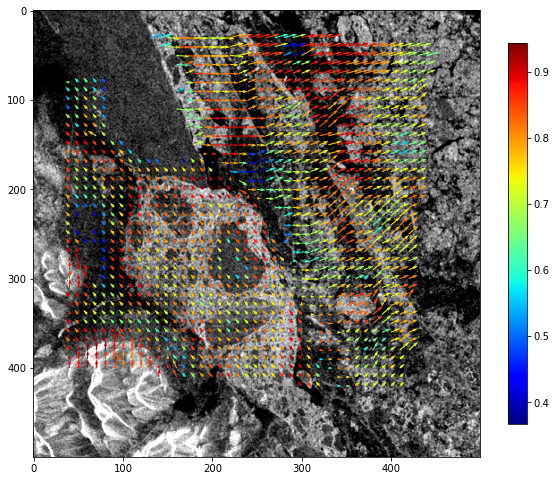

In [8]:
# plot results of pattern matching

# find cells with correlation over 0.4
gpi = hpm*rpm > 4

# convert lon/lat into cartesian coordinates (only valid)
x1pm, y1pm = sid.n1.transform_points(lon1pm[gpi], lat1pm[gpi], DstToSrc=1)
x2pm, y2pm = sid.n1.transform_points(lon2pm[gpi], lat2pm[gpi], DstToSrc=1)

# compute ice drift speed in cartesian coordinates
dx_pm = x2pm - x1pm
dy_pm = y2pm - y1pm

# plot vectors of sea ice drift from Feature Tracking, color by MCC
plt.figure(figsize=(10,10))
plt.imshow(sid.n1[1], cmap='gray')
plt.quiver(x1pm, y1pm, dx_pm, dy_pm, rpm[gpi],
           angles='xy', scale_units='xy', scale=0.2, cmap='jet')
plt.colorbar(shrink=0.7)